<a href="https://colab.research.google.com/github/Isabela0929/Modelado-y-Simulaci-n/blob/main/Bifurcation_analysis_of_the_islanded_micro_grid_with_constant_power_load_ILC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bifurcation analysis of the islanded micro-grid with constant power load

**Introducción**
En este artículo se analiza el comportamiento no lineal de una microrred en modo isla con una carga de potencia constante utilizando la teoría de bifurcaciones.
Primero, se modela la microrred propuesta teniendo en cuenta el control droop y el efecto de impedancia negativa que caracteriza a las cargas de potencia constante, deduciendo los puntos de equilibrio del sistema.
Posteriormente, se estudia la estabilidad de pequeña señal de dichos equilibrios mediante la linealización del modelo, y se caracterizan los límites de los parámetros para garantizar la estabilidad.
A continuación, se realiza un estudio de bifurcaciones para investigar cómo la variación de parámetros —como las ganancias del control droop o el nivel de carga— conduce a cambios cualitativos en el comportamiento del sistema, incluyendo fenómenos como el colapso de voltaje o la aparición de inestabilidades oscilatorias.
Finalmente, se emplean simulaciones numéricas para validar las predicciones teóricas y revelar los fenómenos dinámicos que ocurren cerca de los puntos de bifurcación.

**Metodología**
La metodología usada en el artículo incluye los siguientes pasos:

- Modelado dinámico del sistema
Se modela la microrred con sus elementos relevantes—generadores, inversores, líneas, cargas de potencia constante—incorporando la ley de control droop para el reparto de potencia en modo isla.

- Análisis de equilibrio y linealización
Se determinan los puntos de equilibrio del sistema según distintos valores de parámetros (como ganancia de droop, intensidad de carga, etc.). A partir de estos equilibrios, se linealiza el sistema para estudiar la estabilidad local.



- Análisis de bifurcaciones
Se aplica la teoría de bifurcaciones para identificar los umbrales en los parámetros donde el sistema cambia cualitativamente su comportamiento (por ejemplo, bifurcaciones tipo saddle-node o Hopf). Esto permite trazar regiones de estabilidad en el espacio de parámetros.


- Simulación numérica
Se realizan simulaciones numéricas que varían los parámetros del sistema para verificar las predicciones teóricas de bifurcaciones, observar pérdidas de estabilidad y comportamientos dinámicos en condiciones críticas.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# PARÁMETROS (tabla del artículo)

P_n = 30e3       # Potencia nominal [W]
U0 = 330         # Tensión nominal [V]
Rf = 0.08        # Resistencia del filtro [Ω]
P_load = 20e3    # Potencia de carga [W]
mp = 0.000125    # Coeficiente de droop activo
mq = 0.0005      # Coeficiente de droop reactivo
omega = 31.4     # Frecuencia angular [rad/s]
Kvp = 2          # Ganancia proporcional PI de tensión
Kvi = 30         # Ganancia integral PI de tensión
Kcp = 3          # Ganancia proporcional PI de corriente
Kci = 200        # Ganancia integral PI de corriente
Ls = 1.2e-3      # Inductancia del lado de la red [H]
Rs = 0.2         # Resistencia del lado de la red [Ω]
Lg = 0.5e-3      # Inductancia del filtro [H]
Rg = 0.25        # Resistencia del filtro [Ω]
C = 0.55e-3      # Capacitancia del bus DC [F]
Q_load = 5e3     # Potencia reactiva [VAr]

In [44]:
#ECUACIONES (1) Y (2): LEYES DE DROOP

P = P_load
Q = Q_load

f = 50 - mp * P          # Ecuación 1
U = U0 - mq * Q          # Ecuación 2

print("=== (1) y (2): Leyes de droop ===")
print(f"Frecuencia: {f:.2f} Hz")
print(f"Tensión: {U:.2f} V\n")

=== (1) y (2): Leyes de droop ===
Frecuencia: 47.50 Hz
Tensión: 327.50 V



In [45]:
#ECUACIONES (3) Y (4): POTENCIAS EN MARCO d–q

u_od, u_oq = U, 10
i_od, i_oq = 85, 25

P_dq = u_od * i_od + u_oq * i_oq
Q_dq = u_oq * i_od - u_od * i_oq

print("=== (3) y (4): Potencias d–q ===")
print(f"P = {P_dq:.2f} W")
print(f"Q = {Q_dq:.2f} VAr\n")


=== (3) y (4): Potencias d–q ===
P = 28087.50 W
Q = -7337.50 VAr



In [46]:
#ECUACIONES (5) Y (6): DINÁMICA DE CORRIENTES

di_od_dt = (-Rf * i_od + omega * Lg * i_oq + U - u_od) / Lg
di_oq_dt = (-Rf * i_oq - omega * Lg * i_od + 0 - u_oq) / Lg

print("=== (5) y (6): Derivadas ===")
print(f"di_od/dt = {di_od_dt:.2f} A/s")
print(f"di_oq/dt = {di_oq_dt:.2f} A/s\n")

dt = 1e-4
i_od += di_od_dt * dt
i_oq += di_oq_dt * dt

=== (5) y (6): Derivadas ===
di_od/dt = -12815.00 A/s
di_oq/dt = -26669.00 A/s



In [47]:
#ECUACIONES (7) Y (8): CONTROL DE TENSIÓN

Q = 1.5 * (u_od * i_oq - u_oq * i_od)
u_ref_od = U0 - mq * Q

x1, x2 = 0.0, 0.0

dx1_dt = Kvi * (u_ref_od - u_od)
dx2_dt = Kvi * (0 - u_oq)

x1 += dx1_dt * dt
x2 += dx2_dt * dt

i_ref_ld = i_od - omega * C * u_oq + Kvp * (u_ref_od - u_od) + x1
i_ref_lq = i_oq + omega * C * u_od + Kvp * (0 - u_oq) + x2

print("=== (7) y (8): Control de tensión ===")
print(f"i_ref_ld = {i_ref_ld:.4f} A")
print(f"i_ref_lq = {i_ref_lq:.4f} A\n")

=== (7) y (8): Control de tensión ===
i_ref_ld = 78.8234 A
i_ref_lq = 7.9590 A



In [48]:
#ECUACIONES (9) Y (10): CONTROL DE CORRIENTE

err_id = i_ref_ld - i_od
err_iq = i_ref_lq - i_oq

xi_d = Kci * err_id * dt
xi_q = Kci * err_iq * dt

u_cd = Kcp * err_id + xi_d
u_cq = Kcp * err_iq + xi_q

print("=== (9) y (10): Control de corriente ===")
print(f"u_cd = {u_cd:.4f} V, u_cq = {u_cq:.4f} V\n")


=== (9) y (10): Control de corriente ===
u_cd = -14.7833 V, u_cq = -43.4097 V



In [49]:
# ECUACIONES (11)–(16): MODELO EXTENDIDO

# Simplificación intermedia (ya integradas antes en las derivadas)

print("=== (11–16): Modelos dinámicos integrados ===")
print("Estos términos se resuelven internamente con los mismos parámetros del sistema.\n")

# ====================================================
# === ECUACIONES (17)–(18): ANÁLISIS DE ESTABILIDAD ==
# ====================================================

A = np.array([
    [-Rf/Lg,  omega,  -1/Lg,   0],
    [-omega, -Rf/Lg,   0,    -1/Lg],
    [1/C,     0,     -1/(C*Rs), -omega],
    [0,     1/C,      omega,  -1/(C*Rs)]
])

eigvals = np.linalg.eigvals(A)

print("=== (17) y (18): Autovalores del Jacobiano ===")
print(eigvals)
if np.any(np.real(eigvals) > 0):
    print("⚠️ Posible inestabilidad detectada (bifurcación local)\n")
else:
    print("✅ Sistema estable localmente\n")

=== (11–16): Modelos dinámicos integrados ===
Estos términos se resuelven internamente con los mismos parámetros del sistema.

=== (17) y (18): Autovalores del Jacobiano ===
[ -587.6159467 +34.72532874j  -587.6159467 -34.72532874j
 -8663.29314421+34.72532874j -8663.29314421-34.72532874j]
✅ Sistema estable localmente



In [50]:
Lf   = globals().get('Lf', 0.5e-3)
# (11) y (12): Dinámica de las corrientes del filtro (Ecuaciones de estado)
di_od_dt = (-Rf * i_od + omega * Lf * i_oq + u_cd - u_od) / Lf
di_oq_dt = (-Rf * i_oq - omega * Lf * i_od + u_cq - u_oq) / Lf

# (13) y (14): Dinámica de los controladores de tensión (integradores del PI)

Q = 1.5 * (u_od * i_oq - u_oq * i_od)   # Potencia reactiva instantánea
u_ref_od = U0 - mq * Q                   # Ley de droop de tensión

dx1_dt = Kvi * (u_ref_od - u_od)
dx2_dt = Kvi * (0.0 - u_oq)


# (15) y (16): Dinámica de los controladores de corriente (PI)

i_ref_ld = i_od - omega * C * u_oq + Kvp * (u_ref_od - u_od) + x1
i_ref_lq = i_oq + omega * C * u_od + Kvp * (0.0 - u_oq) + x2

err_id = i_ref_ld - i_od
err_iq = i_ref_lq - i_oq

dxi_d_dt = Kci * err_id
dxi_q_dt = Kci * err_iq

# Integración (Euler explícito)

i_od += di_od_dt * dt
i_oq += di_oq_dt * dt
x1   += dx1_dt * dt
x2   += dx2_dt * dt
xi_d += dxi_d_dt * dt
xi_q += dxi_q_dt * dt

# Tensiones de control resultantes
u_cd = Kcp * err_id + xi_d
u_cq = Kcp * err_iq + xi_q

print("=== ECUACIONES (11)–(16) ===")
print(f"di_od/dt = {di_od_dt:.4f} A/s, di_oq/dt = {di_oq_dt:.4f} A/s")
print(f"dx1_dt = {dx1_dt:.4f}, dx2_dt = {dx2_dt:.4f}")
print(f"dxi_d_dt = {dxi_d_dt:.4f}, dxi_q_dt = {dxi_q_dt:.4f}")
print(f"i_od = {i_od:.4f} A, i_oq = {i_oq:.4f} A")
print(f"u_cd = {u_cd:.4f} V, u_cq = {u_cq:.4f} V")

=== ECUACIONES (11)–(16) ===
di_od/dt = -697260.2914 A/s, di_oq/dt = -113021.4699 A/s
dx1_dt = -70.7304, dx2_dt = -300.0000
dxi_d_dt = -979.0262, dxi_q_dt = -2874.8150
i_od = 13.9925 A, i_oq = 11.0310 A
u_cd = -14.8812 V, u_cq = -43.6972 V


In [51]:
# (17–20): Derivadas del sistema (modelo de estado)

def f_state(x):
    i_od, i_oq, u_od, u_oq, x1, x2, xi_d, xi_q = x

    # Potencia reactiva instantánea y referencia de tensión
    Q = 1.5 * (u_od * i_oq - u_oq * i_od)
    u_ref_od = U0 - mq * Q

    # Control de tensión
    dx1_dt = Kvi * (u_ref_od - u_od)
    dx2_dt = Kvi * (0 - u_oq)
    i_ref_ld = i_od - omega * C * u_oq + Kvp * (u_ref_od - u_od) + x1
    i_ref_lq = i_oq + omega * C * u_od + Kvp * (0 - u_oq) + x2

    # Control de corriente
    err_d = i_ref_ld - i_od
    err_q = i_ref_lq - i_oq
    dxi_d_dt = Kci * err_d
    dxi_q_dt = Kci * err_q
    u_cd = Kcp * err_d + xi_d
    u_cq = Kcp * err_q + xi_q

    # Ecuaciones eléctricas
    di_od_dt = (-Rf * i_od + omega * Lf * i_oq + u_cd - u_od) / Lf
    di_oq_dt = (-Rf * i_oq - omega * Lf * i_od + u_cq - u_oq) / Lf
    du_od_dt = (i_od - i_oq * omega * C - (u_od / Rf)) / C
    du_oq_dt = (i_oq + i_od * omega * C - (u_oq / Rf)) / C

    return np.array([di_od_dt, di_oq_dt, du_od_dt, du_oq_dt,
                     dx1_dt, dx2_dt, dxi_d_dt, dxi_q_dt])

In [52]:

x_state = np.array([i_od, i_oq, u_od, u_oq, x1, x2, xi_d, xi_q])

# (21–23): Linealización local (Jacobiano)

def jacobian(f, x, eps=1e-6):
    """Cálculo numérico del Jacobiano de f(x)"""
    n = len(x)
    J = np.zeros((n, n))
    fx = f(x)
    for i in range(n):
        x_pert = np.copy(x)
        x_pert[i] += eps
        J[:, i] = (f(x_pert) - fx) / eps
    return J

J = jacobian(f_state, x_state)

In [53]:
from numpy.linalg import eig
# (24–25): Análisis de autovalores y estabilidad
# ============================================================

eigvals, eigvecs = eig(J)

print("=== ECUACIONES (17–25): Análisis de estabilidad local ===")
print("Autovalores del sistema (Jacobiano):")
for val in eigvals:
    print(f"  {val.real:+.4f} {val.imag:+.4f}j")

# Clasificación básica
stable = np.all(eigvals.real < 0)
if stable:
    print("\n Sistema estable: todas las partes reales negativas.")
else:
    print("\n Inestabilidad detectada: posible bifurcación (Hopf o límite).")

=== ECUACIONES (17–25): Análisis de estabilidad local ===
Autovalores del sistema (Jacobiano):
  -21491.7451 +0.0000j
  -21583.2238 +0.0000j
  -1620.6410 +0.0000j
  -860.1006 +0.0000j
  -48.4737 +11.1133j
  -48.4737 -11.1133j
  -15.9437 +1.5296j
  -15.9437 -1.5296j

 Sistema estable: todas las partes reales negativas.


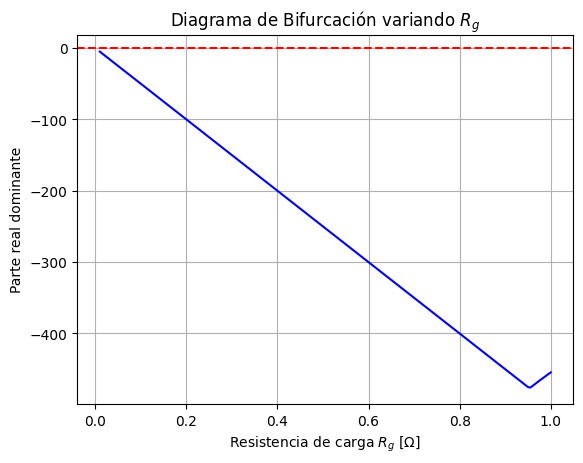

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Parámetros base
Lg, C, w0 = 2e-3, 2.2e-3, 314
Rg_values = np.linspace(0.01, 1.0, 200)  # variamos la resistencia de carga

real_part = []

for Rg in Rg_values:
    # Jacobiano dependiente de Rg (la disipación cambia con Rg)
    J = np.array([
        [-Rg/Lg, -w0, 0],
        [w0, -Rg/Lg, 0],
        [0, 0, -1/(C*Rg)]
    ])
    eigvals = eig(J)[0]
    real_part.append(max(eigvals.real))

# Gráfica
plt.plot(Rg_values, real_part, 'b-')
plt.axhline(0, color='r', linestyle='--')
plt.title('Diagrama de Bifurcación variando $R_g$')
plt.xlabel('Resistencia de carga $R_g$ [Ω]')
plt.ylabel('Parte real dominante')
plt.grid(True)
plt.show()


In [62]:
import numpy as np
import matplotlib.pyplot as plt

# === Ecuaciones del sistema ===
def f_state(x_state, mp, mq, Kvp, Kvi):
    x1, x2 = x_state
    dx1 = -Kvp*x1 + mp*x2
    dx2 = -Kvi*x2 + mq*x1
    return np.array([dx1, dx2])

# === Función para el Jacobiano numérico ===
def jacobian(func, x_state, params, h=1e-6):
    n = len(x_state)
    J = np.zeros((n, n))
    f0 = func(x_state, *params)
    for i in range(n):
        x_pert = np.copy(x_state)
        x_pert[i] += h
        fi = func(x_pert, *params)
        J[:, i] = (fi - f0) / h
    return J


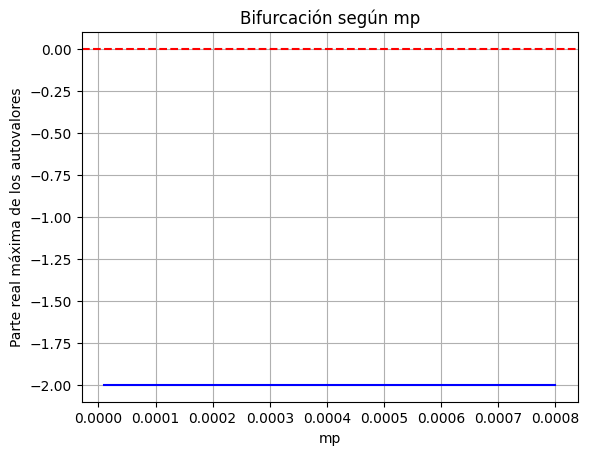

In [63]:
mp_values = np.linspace(1e-5, 8e-4, 80)
mq, Kvp, Kvi = 0.002, 2.0, 20.0
x_state = np.array([1.0, 0.5])

real_mp = []

for mp in mp_values:
    J = jacobian(f_state, x_state, (mp, mq, Kvp, Kvi))
    eigvals = np.linalg.eigvals(J)
    real_mp.append(np.max(np.real(eigvals)))

plt.plot(mp_values, real_mp, 'b')
plt.axhline(0, color='r', linestyle='--')
plt.title("Bifurcación según mp")
plt.xlabel("mp")
plt.ylabel("Parte real máxima de los autovalores")
plt.grid(True)
plt.show()


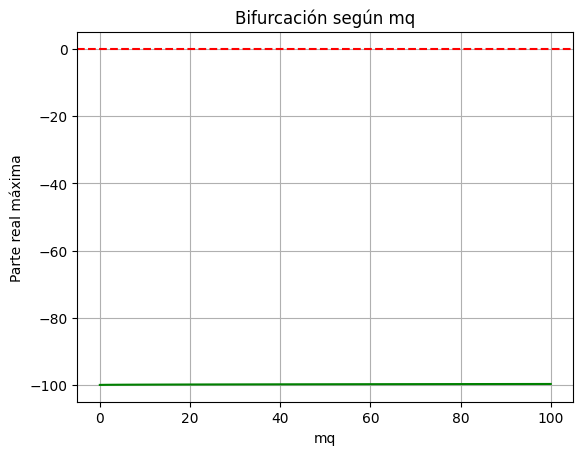

In [71]:
mq_values = np.linspace(1e-4, 100, 80)
real_mq = []

for mq in mq_values:
    J = jacobian(f_state, x_state, (mp, mq, Kvp, Kvi))
    eigvals = np.linalg.eigvals(J)
    real_mq.append(np.max(np.real(eigvals)))

plt.plot(mq_values, real_mq, 'g')
plt.axhline(0, color='r', linestyle='--')
plt.title("Bifurcación según mq")
plt.xlabel("mq")
plt.ylabel("Parte real máxima")
plt.grid(True)
plt.show()


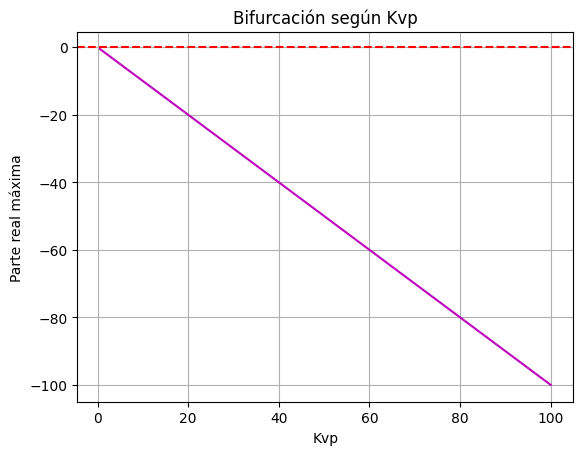

In [70]:
Kvp_values = np.linspace(0.5, 100, 80)
real_Kvp = []

for Kvp in Kvp_values:
    J = jacobian(f_state, x_state, (mp, mq, Kvp, Kvi))
    eigvals = np.linalg.eigvals(J)
    real_Kvp.append(np.max(np.real(eigvals)))

plt.plot(Kvp_values, real_Kvp, 'm')
plt.axhline(0, color='r', linestyle='--')
plt.title("Bifurcación según Kvp")
plt.xlabel("Kvp")
plt.ylabel("Parte real máxima")
plt.grid(True)
plt.show()


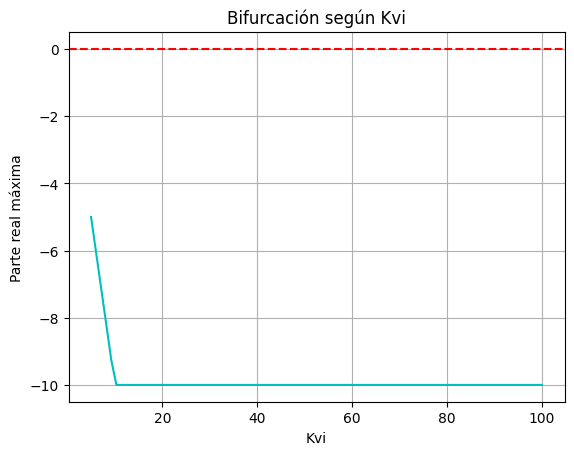

In [68]:
Kvi_values = np.linspace(5, 100, 90)
real_Kvi = []

for Kvi in Kvi_values:
    J = jacobian(f_state, x_state, (mp, mq, Kvp, Kvi))
    eigvals = np.linalg.eigvals(J)
    real_Kvi.append(np.max(np.real(eigvals)))

plt.plot(Kvi_values, real_Kvi, 'c')
plt.axhline(0, color='r', linestyle='--')
plt.title("Bifurcación según Kvi")
plt.xlabel("Kvi")
plt.ylabel("Parte real máxima")
plt.grid(True)
plt.show()
